# Imports

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout
import joblib


# Data import, cleaning checking etc.

In [12]:
import pandas as pd

data = pd.read_csv(r'C:\Users\annun\Downloads\temporary(by_ANNUNAY)\train.csv\train.csv')



In [13]:
#data.head()

In [14]:
# print(data.head())
print(data.info())
#print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

In [15]:
categorical_columns = data.select_dtypes(include=['float64']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


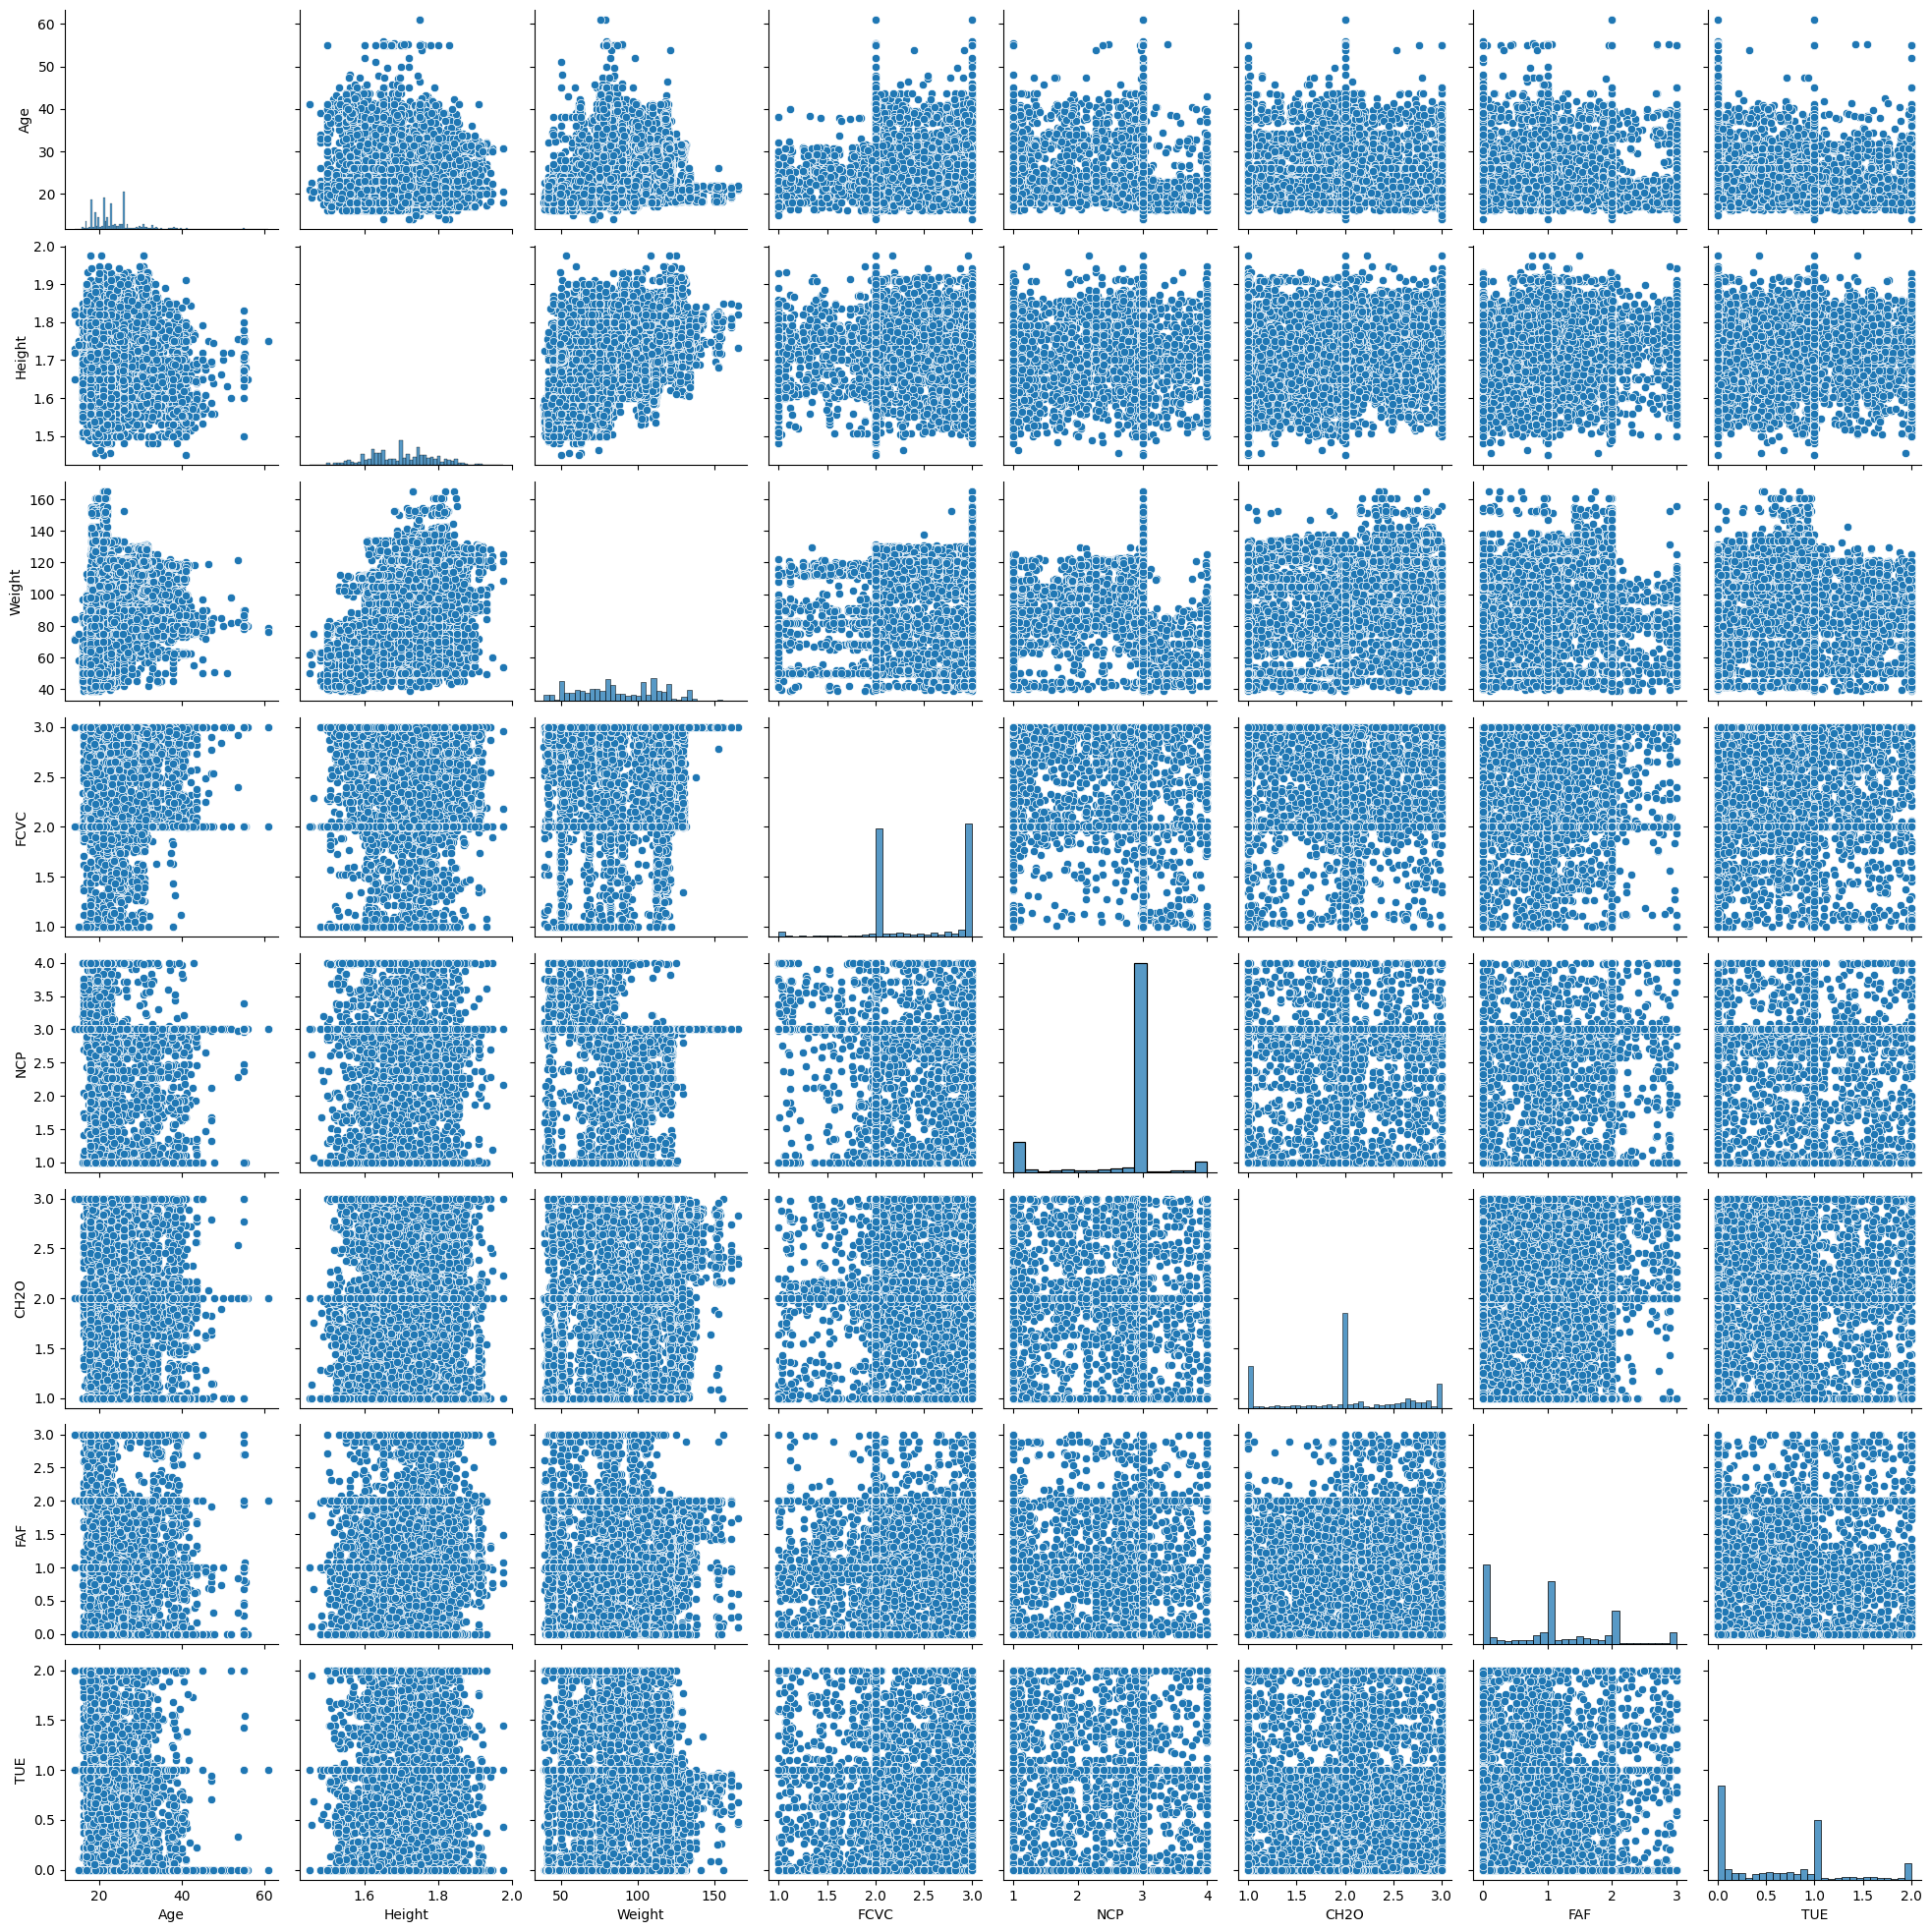

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing your dataset
# Replace 'data' with the name of your DataFrame

# List of numerical columns
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Create a pairplot
sns.pairplot(data[numerical_columns])
plt.show()


In [16]:
data.duplicated().unique()

array([False])

In [17]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [18]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

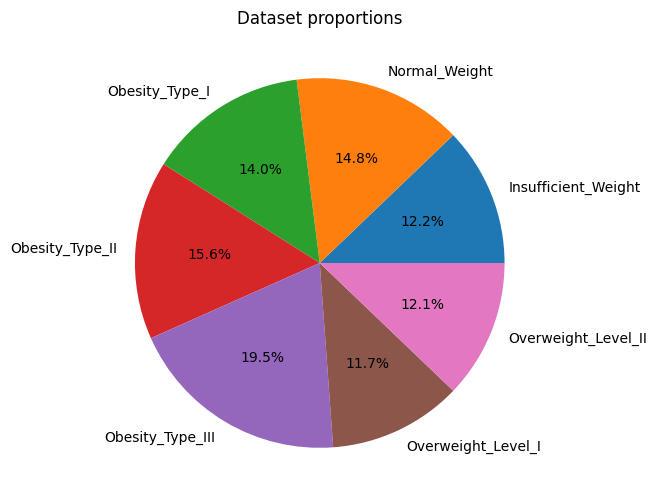

In [19]:
labels, counts = np.unique(data.NObeyesdad, return_counts=True)

plt.figure(figsize=(8, 6))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

In [20]:
#since as per above picture data is almost have equal representation so we will not apply any technique like SMOTE etc. 

In [21]:
data.select_dtypes(include='object').columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# Encoding the data

In [22]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)


Categorical columns: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [23]:
# Initialize a dictionary to store label encoders for each column
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Save the label encoder if you 
                                 # need to inverse transform later


In [26]:
label_encoders

{'Gender': LabelEncoder(),
 'family_history_with_overweight': LabelEncoder(),
 'FAVC': LabelEncoder(),
 'CAEC': LabelEncoder(),
 'SMOKE': LabelEncoder(),
 'SCC': LabelEncoder(),
 'CALC': LabelEncoder(),
 'MTRANS': LabelEncoder(),
 'NObeyesdad': LabelEncoder()}

In [24]:
for column, encoder in label_encoders.items():
    print(f"Column: {column}")
    classes = encoder.classes_
    labels_mapping = {class_: i for i, class_ in enumerate(classes)}
    print("Label Mapping:")
    for class_, label in labels_mapping.items():
        print(f"{class_}: {label}")
    print()


Column: Gender
Label Mapping:
Female: 0
Male: 1

Column: family_history_with_overweight
Label Mapping:
no: 0
yes: 1

Column: FAVC
Label Mapping:
no: 0
yes: 1

Column: CAEC
Label Mapping:
Always: 0
Frequently: 1
Sometimes: 2
no: 3

Column: SMOKE
Label Mapping:
no: 0
yes: 1

Column: SCC
Label Mapping:
no: 0
yes: 1

Column: CALC
Label Mapping:
Frequently: 0
Sometimes: 1
no: 2

Column: MTRANS
Label Mapping:
Automobile: 0
Bike: 1
Motorbike: 2
Public_Transportation: 3
Walking: 4

Column: NObeyesdad
Label Mapping:
Insufficient_Weight: 0
Normal_Weight: 1
Obesity_Type_I: 2
Obesity_Type_II: 3
Obesity_Type_III: 4
Overweight_Level_I: 5
Overweight_Level_II: 6



In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  int32  
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  int32  
 5   FAVC                            20758 non-null  int32  
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  int32  
 9   SMOKE                           20758 non-null  int32  
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  int32  
 12  FAF                             

# Model building

In [28]:
X = data.drop('NObeyesdad',axis = 1)
Y = data['NObeyesdad']



0        6
1        1
2        0
3        4
4        6
        ..
20753    3
20754    0
20755    3
20756    6
20757    3
Name: NObeyesdad, Length: 20758, dtype: int32

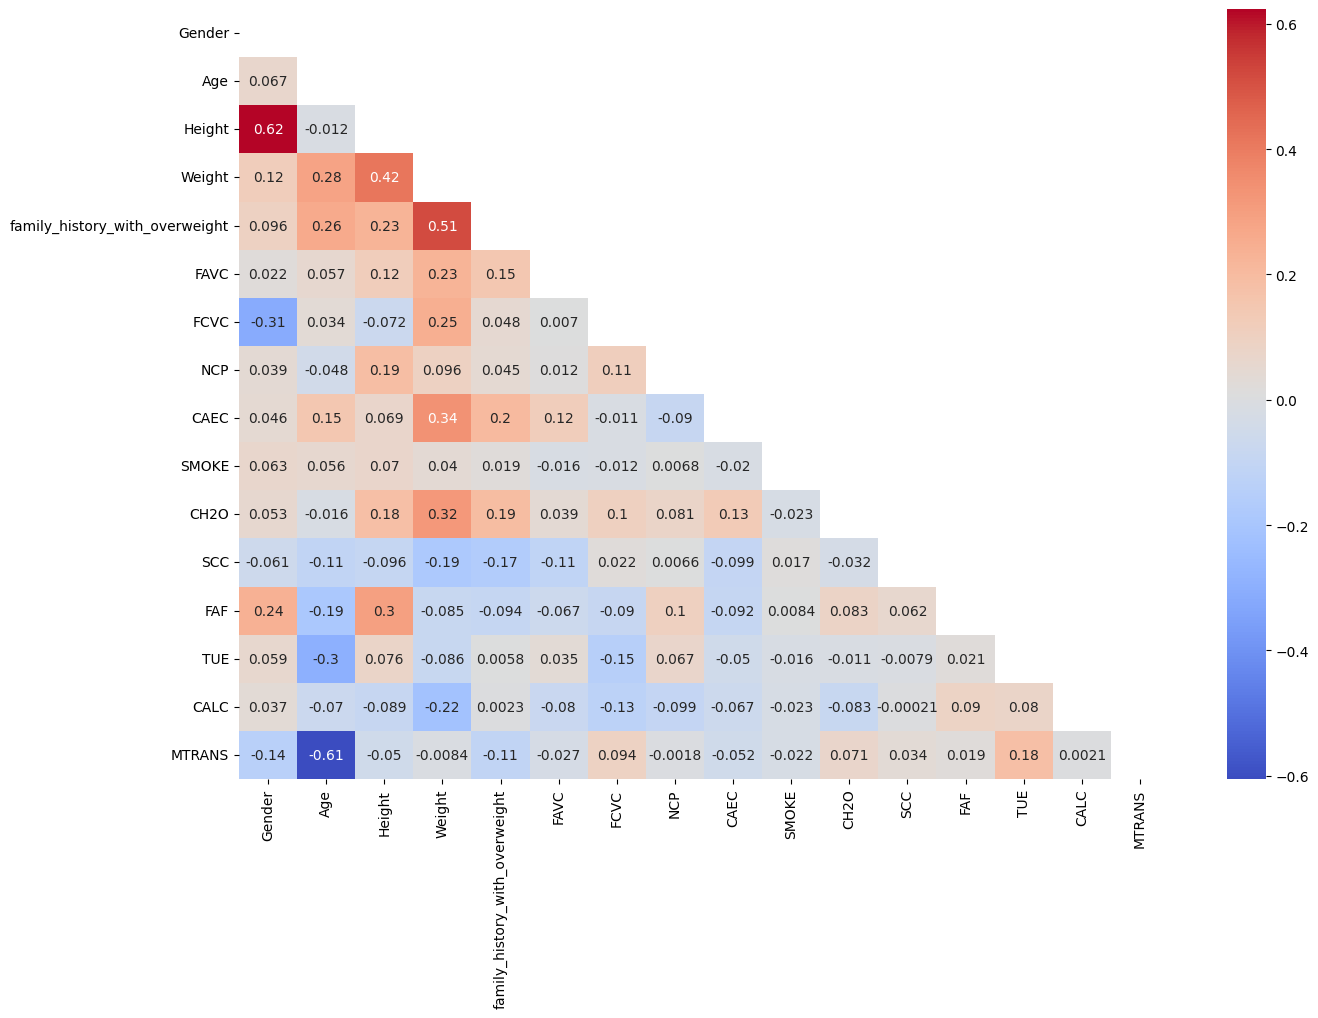

In [83]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=X.corr(), cmap='coolwarm',  mask=np.triu(X.corr()), annot=True)
plt.show()

In [84]:
# data split 

In [85]:

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

#Step 9: Standardize the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [82]:
X.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [86]:
# different model building 

##  logistic regression 

In [69]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.8627167630057804
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       524
           1       0.85      0.80      0.82       626
           2       0.82      0.84      0.83       543
           3       0.95      0.97      0.96       657
           4       1.00      1.00      1.00       804
           5       0.70      0.70      0.70       484
           6       0.72      0.68      0.70       514

    accuracy                           0.86      4152
   macro avg       0.85      0.85      0.85      4152
weighted avg       0.86      0.86      0.86      4152



In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Assuming lr_model is your Logistic Regression model
# Assuming X_train and y_train are your training features and labels, respectively

# Perform 5-fold cross-validation by default
cv_scores = cross_val_score(lr_model, X_train, y_train)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.85189645 0.86449864 0.844324   0.85155074 0.87262873]
Mean CV Accuracy: 0.8569797111443588


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Define the hyperparameters grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
}

# by defualt penalty is L2 ridge regression we can also mention the penalty in param grid
# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_lr_model = grid_search.best_estimator_

# Predict using the best model
lr_pred = best_lr_model.predict(X_test)

# Evaluate the best model on the test set
lr_accuracy = accuracy_score(y_test, lr_pred)
print("\nTest Set Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_pred))


Best Hyperparameters: {'C': 100}

Test Set Accuracy: 0.8665703275529865
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       524
           1       0.86      0.81      0.83       626
           2       0.82      0.84      0.83       543
           3       0.96      0.97      0.96       657
           4       1.00      1.00      1.00       804
           5       0.71      0.72      0.72       484
           6       0.72      0.69      0.70       514

    accuracy                           0.87      4152
   macro avg       0.85      0.85      0.85      4152
weighted avg       0.87      0.87      0.87      4152



Test Set Accuracy: 0.8627167630057804
Training Set Accuracy: 0.8608334336986632


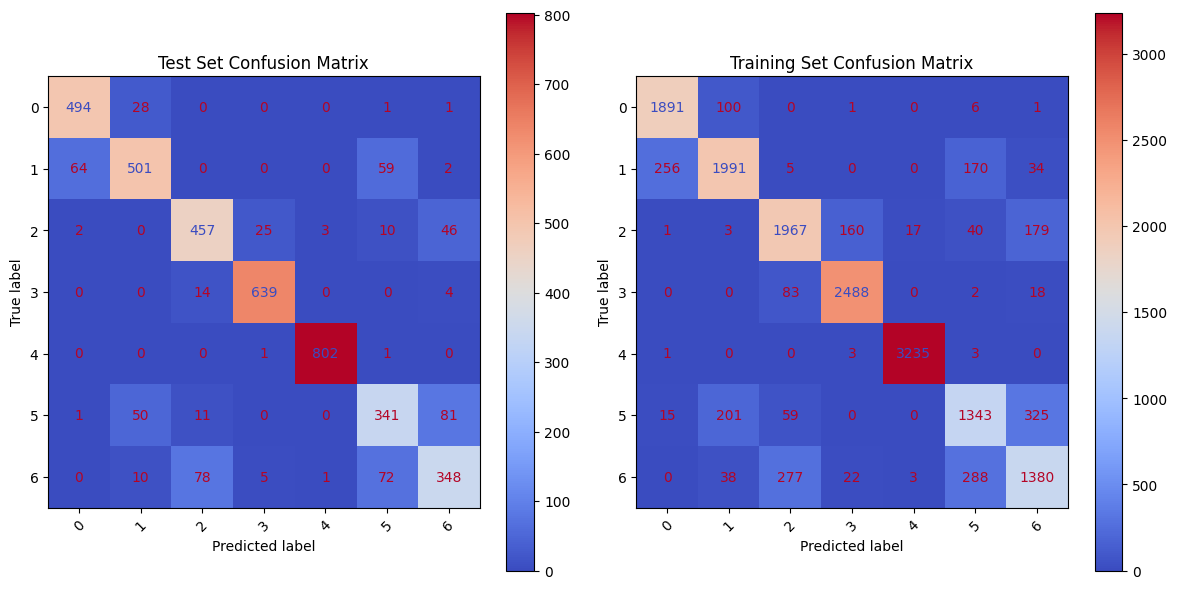

In [24]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Assuming lr_pred contains predictions on the test set and lr_model is your Logistic Regression model

# Calculate confusion matrices
cm = confusion_matrix(y_test, lr_pred)
cm1 = confusion_matrix(y_train, lr_model.predict(X_train))

# Plot confusion matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap='coolwarm', ax=plt.gca())
plt.xticks(rotation=45)
plt.title('Test Set Confusion Matrix')

plt.subplot(1, 2, 2)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=lr_model.classes_)
disp1.plot(cmap='coolwarm', ax=plt.gca())
plt.xticks(rotation=45)
plt.title('Training Set Confusion Matrix')

plt.tight_layout()

# Calculate accuracy
test_accuracy = accuracy_score(y_test, lr_pred)
training_accuracy = accuracy_score(y_train, lr_model.predict(X_train))

print("Test Set Accuracy:", test_accuracy)
print("Training Set Accuracy:", training_accuracy)

plt.show()

logistic_train  =  training_accuracy
logistic_test =  test_accuracy



## Decision Tree Classifier

In [87]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=10,random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Classifier Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_pred))


Decision Tree Classifier Accuracy: 0.8711464354527938
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       524
           1       0.82      0.82      0.82       626
           2       0.86      0.84      0.85       543
           3       0.96      0.96      0.96       657
           4       1.00      1.00      1.00       804
           5       0.71      0.71      0.71       484
           6       0.74      0.78      0.76       514

    accuracy                           0.87      4152
   macro avg       0.86      0.86      0.86      4152
weighted avg       0.87      0.87      0.87      4152



|--- Weight <= 0.44
|   |--- Weight <= -0.45
|   |   |--- class: 1
|   |--- Weight >  -0.45
|   |   |--- class: 6
|--- Weight >  0.44
|   |--- Gender <= 0.00
|   |   |--- class: 4
|   |--- Gender >  0.00
|   |   |--- class: 3



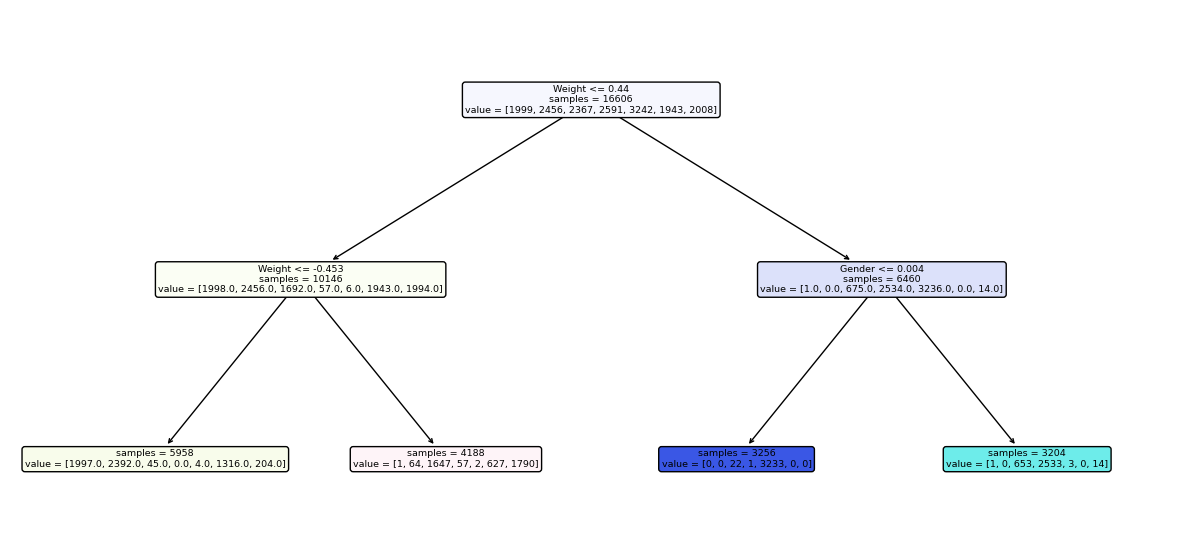

In [156]:
# ##Plotting the trees 

features= ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'] 

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(dt_model, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text(dt_model, feature_names = features))


#done for max dept 2 for just visulaizing the tree



In [145]:
# decision tree validation 

In [88]:
from sklearn.metrics import confusion_matrix

# Predictions on the training set
train_predict = dt_model.predict(X_train)
train_cm = confusion_matrix(y_train, train_predict)
train_accuracy = np.sum(np.diag(train_cm)) / np.sum(train_cm)
print("Training Set Confusion Matrix:")
print(train_cm)
print("Training Set Accuracy:", train_accuracy)

# Predictions on the test set
test_predict = dt_model.predict(X_test)
test_cm = confusion_matrix(y_test, test_predict)
test_accuracy = np.sum(np.diag(test_cm)) / np.sum(test_cm)
print("\nTest Set Confusion Matrix:")
print(test_cm)
print("Test Set Accuracy:", test_accuracy)


decision_train  =  train_accuracy
decision_test =  test_accuracy

Training Set Confusion Matrix:
[[1898   96    1    0    0    2    2]
 [ 103 2183    4    0    0  148   18]
 [   1    4 2143   41    2   34  142]
 [   0    1   23 2550    0    0   17]
 [   1    0    2    2 3234    3    0]
 [  12  169   26    0    0 1533  203]
 [   0   45   98    2    0  144 1719]]
Training Set Accuracy: 0.9189449596531374

Test Set Confusion Matrix:
[[475  47   0   0   0   1   1]
 [ 41 512   0   0   0  67   6]
 [  2   2 455  15   1  14  54]
 [  1   0  24 628   1   0   3]
 [  0   0   1   1 802   0   0]
 [  1  52  12   0   0 346  73]
 [  0  10  36   8   0  61 399]]
Test Set Accuracy: 0.8711464354527938


In [85]:
# cross validation and grid search 

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Define the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters grid for GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_dt_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Predict using the best model
dt_pred = best_dt_model.predict(X_test)

# Evaluate the best model on the test set
dt_accuracy = accuracy_score(y_test, dt_pred)
print("\nTest Set Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_pred))


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Cross-Validation Scores: [0.8705599  0.88136104 0.8720265  0.87172538 0.88407106]
Mean CV Accuracy: 0.8759487768802365

Test Set Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       524
           1       0.83      0.82      0.83       626
           2       0.87      0.84      0.86       543
           3       0.97      0.96      0.96       657
           4       1.00      1.00      1.00       804
           5       0.72      0.71      0.72       484
           6       0.74      0.78      0.76       514

    accuracy                           0.88      4152
   macro avg       0.86      0.86      0.86      4152
weighted avg       0.88      0.88      0.88      4152



## Random forest 

In [89]:
#random forest 

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_pred))


Random Forest Classifier Accuracy: 0.8959537572254336
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       524
           1       0.84      0.88      0.86       626
           2       0.88      0.86      0.87       543
           3       0.98      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.78      0.75      0.77       484
           6       0.78      0.80      0.79       514

    accuracy                           0.90      4152
   macro avg       0.89      0.88      0.88      4152
weighted avg       0.90      0.90      0.90      4152



In [90]:
# Predictions on the training set
train_predict = rf_model.predict(X_train)
train_cm = confusion_matrix(y_train, train_predict)
train_accuracy = np.sum(np.diag(train_cm)) / np.sum(train_cm)
print("Training Set Confusion Matrix:")
print(train_cm)
print("Training Set Accuracy:", train_accuracy)

# Predictions on the test set
test_predict = rf_model.predict(X_test)
test_cm = confusion_matrix(y_test, test_predict)
test_accuracy = np.sum(np.diag(test_cm)) / np.sum(test_cm)
print("\nTest Set Confusion Matrix:")
print(test_cm)
print("Test Set Accuracy:", test_accuracy)
print('\nwe can see that training data is doing exceptionally well,\nthis indicated it is overfitting the data,we will do grid\nsearch for the optimal hyperparameters')

randomforest_train  =  train_accuracy
randomforest_test =  test_accuracy

Training Set Confusion Matrix:
[[1999    0    0    0    0    0    0]
 [   0 2456    0    0    0    0    0]
 [   0    0 2367    0    0    0    0]
 [   0    0    0 2591    0    0    0]
 [   0    0    0    0 3242    0    0]
 [   0    0    0    0    0 1943    0]
 [   0    0    0    0    0    0 2008]]
Training Set Accuracy: 1.0

Test Set Confusion Matrix:
[[483  38   0   0   0   2   1]
 [ 29 553   0   0   0  37   7]
 [  2   1 469  12   1  16  42]
 [  0   0  13 640   2   0   2]
 [  0   0   1   1 802   0   0]
 [  1  51   6   0   0 363  63]
 [  0  14  41   3   0  46 410]]
Test Set Accuracy: 0.8959537572254336

we can see that training data is doing exceptionally well,
this indicated it is overfitting the data,we will do grid
search for the optimal hyperparameters


In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Fewer trees
    'max_depth': [5, 10, 15],  # Limit the depth of the trees
    'min_samples_split': [2, 5, 10],  # Increase min samples required to split
    'min_samples_leaf': [1, 2, 4]  # Increase min samples required at a leaf
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the training set
train_predict = best_rf_model.predict(X_train)
train_cm = confusion_matrix(y_train, train_predict)
train_accuracy = np.sum(np.diag(train_cm)) / np.sum(train_cm)
print("\nTraining Set Confusion Matrix:")
print(train_cm)
print("Training Set Accuracy:", train_accuracy)

# Evaluate the best model on the test set
test_predict = best_rf_model.predict(X_test)
test_cm = confusion_matrix(y_test, test_predict)
test_accuracy = np.sum(np.diag(test_cm)) / np.sum(test_cm)
print("\nTest Set Confusion Matrix:")
print(test_cm)
print("Test Set Accuracy:", test_accuracy)
print(classification_report(y_test, test_predict))


Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Training Set Confusion Matrix:
[[1968   31    0    0    0    0    0]
 [  35 2390    0    0    0   19   12]
 [   1    2 2286   27    5   16   30]
 [   0    0   14 2572    0    0    5]
 [   1    1    3    1 3234    2    0]
 [   9   63   13    0    0 1787   71]
 [   0    9   39    3    0   39 1918]]
Training Set Accuracy: 0.9728411417559918

Test Set Confusion Matrix:
[[483  38   0   0   0   2   1]
 [ 25 556   0   0   0  39   6]
 [  2   1 472  14   1  15  38]
 [  0   0  13 639   2   0   3]
 [  0   0   0   1 802   1   0]
 [  1  51   7   0   0 362  63]
 [  0  12  35   4   0  42 421]]
Test Set Accuracy: 0.8995664739884393
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       524
           1       0.84      0.89      0.87       626
           2       0.90      0.87      0.88       543
           3       0.97      0.97      0.97       

## K-Nearest Neighbors

In [91]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print(classification_report(y_test, knn_pred))


K-Nearest Neighbors Accuracy: 0.7377167630057804
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       524
           1       0.56      0.62      0.59       626
           2       0.64      0.72      0.68       543
           3       0.92      0.93      0.92       657
           4       1.00      1.00      1.00       804
           5       0.51      0.40      0.45       484
           6       0.61      0.54      0.57       514

    accuracy                           0.74      4152
   macro avg       0.71      0.71      0.71      4152
weighted avg       0.74      0.74      0.73      4152



In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming knn_model is already trained
# knn_model = KNeighborsClassifier(n_neighbors=5)
# knn_model.fit(X_train, y_train)

# Predictions on the training set
train_predict = knn_model.predict(X_train)
train_cm = confusion_matrix(y_train, train_predict)
train_accuracy = np.sum(np.diag(train_cm)) / np.sum(train_cm)
print("Training Set Confusion Matrix:")
print(train_cm)
print("Training Set Accuracy:", train_accuracy)

# Predictions on the test set
test_predict = knn_model.predict(X_test)
test_cm = confusion_matrix(y_test, test_predict)
test_accuracy = np.sum(np.diag(test_cm)) / np.sum(test_cm)
print("\nTest Set Confusion Matrix:")
print(test_cm)
print("Test Set Accuracy:", test_accuracy)

KNN_train  =  train_accuracy
KNN_test =  test_accuracy



Training Set Confusion Matrix:
[[1706  241    4    1    0   33   14]
 [ 321 1846   42    4    1  168   74]
 [  11   63 1937  118   15   89  134]
 [   0   10   80 2471    0    3   27]
 [   0    2    2    2 3233    2    1]
 [ 106  343  169   19    1 1143  162]
 [  45  179  216   53    0  207 1308]]
Training Set Accuracy: 0.8216307358785981

Test Set Confusion Matrix:
[[404 105   2   0   0   8   5]
 [101 390  22   1   0  73  39]
 [  5  22 389  26   2  42  57]
 [  0   3  31 609   0   1  13]
 [  0   1   0   2 800   1   0]
 [ 31 124  72   2   0 196  59]
 [  9  56  92  21   0  61 275]]
Test Set Accuracy: 0.7377167630057804


In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 31)),  # Trying different numbers of neighbors
    'weights': ['uniform', 'distance'],  # Trying both uniform and distance weights
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Trying different distance metrics
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_knn_model = grid_search.best_estimator_

# Evaluate the best model on the training set
train_predict = best_knn_model.predict(X_train)
train_cm = confusion_matrix(y_train, train_predict)
train_accuracy = np.sum(np.diag(train_cm)) / np.sum(train_cm)
print("\nTraining Set Confusion Matrix:")
print(train_cm)
print("Training Set Accuracy:", train_accuracy)

# Evaluate the best model on the test set
test_predict = best_knn_model.predict(X_test)
test_cm = confusion_matrix(y_test, test_predict)
test_accuracy = np.sum(np.diag(test_cm)) / np.sum(test_cm)
print("\nTest Set Confusion Matrix:")
print(test_cm)
print("Test Set Accuracy:", test_accuracy)
print(classification_report(y_test, test_predict))


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}

Training Set Confusion Matrix:
[[1999    0    0    0    0    0    0]
 [   0 2456    0    0    0    0    0]
 [   0    0 2367    0    0    0    0]
 [   0    0    0 2591    0    0    0]
 [   0    0    0    0 3242    0    0]
 [   0    0    0    0    0 1943    0]
 [   0    0    0    0    0    0 2008]]
Training Set Accuracy: 1.0

Test Set Confusion Matrix:
[[420  94   2   0   0   4   4]
 [ 56 456  11   1   0  59  43]
 [  3  15 403  23   5  30  64]
 [  0   2  20 620   0   0  15]
 [  0   1   0   2 801   0   0]
 [ 14 121  48   1   1 225  74]
 [  4  42  59  18   0  52 339]]
Test Set Accuracy: 0.7861271676300579
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       524
           1       0.62      0.73      0.67       626
           2       0.74      0.74      0.74       543
           3       0.93      0.94      0.94       657
           4       0.99      1.

## Support Vector Classifier

In [93]:
# Support Vector Classifier
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)
print("Support Vector Classifier Accuracy:", svc_accuracy)
print(classification_report(y_test, svc_pred))


Support Vector Classifier Accuracy: 0.8634393063583815
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       524
           1       0.80      0.81      0.81       626
           2       0.85      0.84      0.84       543
           3       0.97      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.69      0.70      0.70       484
           6       0.73      0.72      0.72       514

    accuracy                           0.86      4152
   macro avg       0.85      0.85      0.85      4152
weighted avg       0.86      0.86      0.86      4152



In [94]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming svc_model is already trained
# svc_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
# svc_model.fit(X_train, y_train)

# Predictions on the training set
train_predict = svc_model.predict(X_train)
train_cm = confusion_matrix(y_train, train_predict)
train_accuracy = np.sum(np.diag(train_cm)) / np.sum(train_cm)
print("Training Set Confusion Matrix:")
print(train_cm)
print("Training Set Accuracy:", train_accuracy)

# Predictions on the test set
test_predict = svc_model.predict(X_test)
test_cm = confusion_matrix(y_test, test_predict)
test_accuracy = np.sum(np.diag(test_cm)) / np.sum(test_cm)
print("\nTest Set Confusion Matrix:")
print(test_cm)
print("Test Set Accuracy:", test_accuracy)

svc_train  =  train_accuracy
svc_test =  test_accuracy


Training Set Confusion Matrix:
[[1870  120    1    1    0    6    1]
 [ 162 2112    2    0    0  156   24]
 [   1    4 2046  102   13   51  150]
 [   0    1   47 2528    0    0   15]
 [   1    0    4    2 3232    3    0]
 [  11  177   55    0    0 1457  243]
 [   0   31  158   16    0  199 1604]]
Training Set Accuracy: 0.8941948693243406

Test Set Confusion Matrix:
[[470  52   0   0   0   1   1]
 [ 40 510   0   0   0  63  13]
 [  2   2 456  16   1  17  49]
 [  0   0  15 638   0   0   4]
 [  0   0   1   2 800   1   0]
 [  3  57  12   0   0 341  71]
 [  0  15  54   5   0  70 370]]
Test Set Accuracy: 0.8634393063583815


In [142]:
# grid search and regularization 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 50],               # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],  # Kernel coefficient
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']   # Kernel type
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_svc_model = grid_search.best_estimator_

# Evaluate the best model on the training set
train_pred = best_svc_model.predict(X_train)
train_cm = confusion_matrix(y_train, train_pred)
train_accuracy = accuracy_score(y_train, train_pred)
print("\nTraining Set Confusion Matrix:")
print(train_cm)
print("Training Set Accuracy:", train_accuracy)

# Evaluate the best model on the test set
svc_pred = best_svc_model.predict(X_test)
test_cm = confusion_matrix(y_test, svc_pred)
svc_accuracy = accuracy_score(y_test, svc_pred)
print("\nTest Set Confusion Matrix:")
print(test_cm)
print("Test Set Accuracy:", svc_accuracy)
print(classification_report(y_test, svc_pred))


Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Training Set Confusion Matrix:
[[1538   71    0    1    0    4    1]
 [ 147 1677    2    0    0  116   15]
 [   0    1 1613   81   11   37  131]
 [   0    0   40 2034    0    0   11]
 [   1    0    3    2 2560    2    0]
 [  11  124   41    0    0 1192  193]
 [   0   20  146   12    0  168 1278]]
Training Set Accuracy: 0.8952122854561879

Test Set Confusion Matrix:
[[490  32   0   0   0   1   1]
 [ 52 508   0   0   0  61   5]
 [  2   1 463  16   1  10  50]
 [  0   0  14 640   0   0   3]
 [  0   0   0   1 802   0   1]
 [  1  32  16   0   0 362  73]
 [  0   9  61   6   0  60 378]]
Test Set Accuracy: 0.8774084778420038
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       524
           1       0.87      0.81      0.84       626
           2       0.84      0.85      0.84       543
           3       0.97      0.97      0.97       657
           4       1.00      1.00      1.00  

## Gradient boosting Machine (GBM)

In [160]:
#Boosting -Ensemble Learing
#Gradient boosting Machine (GBM)

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=100,max_features=5 )
gbc_model.fit(X_train,y_train)

gbc_pred = gbc_model.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_pred)
print("Support Vector Classifier Accuracy:", gbc_accuracy)
print(classification_report(y_test, gbc_pred))

Support Vector Classifier Accuracy: 0.8848747591522158
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       524
           1       0.84      0.86      0.85       626
           2       0.86      0.85      0.85       543
           3       0.96      0.97      0.96       657
           4       1.00      1.00      1.00       804
           5       0.78      0.72      0.75       484
           6       0.76      0.78      0.77       514

    accuracy                           0.88      4152
   macro avg       0.87      0.87      0.87      4152
weighted avg       0.88      0.88      0.88      4152



In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predictions on the training set
train_pred = gbc_model.predict(X_train)
train_cm = confusion_matrix(y_train, train_pred)
train_accuracy = accuracy_score(y_train, train_pred)
print("Training Set Confusion Matrix:")
print(train_cm)
print("Training Set Accuracy:", train_accuracy)

# Predictions on the test set
test_pred = gbc_model.predict(X_test)
test_cm = confusion_matrix(y_test, test_pred)
test_accuracy = accuracy_score(y_test, test_pred)
print("\nTest Set Confusion Matrix:")
print(test_cm)
print("Test Set Accuracy:", test_accuracy)


gbc_train  =  train_accuracy
gbc_test =  test_accuracy

Training Set Confusion Matrix:
[[1878  113    0    1    0    5    2]
 [ 152 2120    0    0    0  147   37]
 [   1    5 2094   91    9   43  124]
 [   0    0   57 2520    0    1   13]
 [   1    1    1    3 3233    3    0]
 [  15  206   46    0    0 1398  278]
 [   1   48  168   14    0  133 1644]]
Training Set Accuracy: 0.8964831988437914

Test Set Confusion Matrix:
[[486  35   0   0   0   2   1]
 [ 34 538   0   0   0  41  13]
 [  2   0 459  21   1  16  44]
 [  0   0  17 637   2   0   1]
 [  0   0   0   1 802   1   0]
 [  1  55  13   0   0 349  66]
 [  0  16  47   7   0  41 403]]
Test Set Accuracy: 0.8848747591522158


In [146]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Create a GradientBoostingClassifier instance
gbc = GradientBoostingClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_gbc_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_pred = best_gbc_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print("Test Set Accuracy with Best Parameters:", test_accuracy)


## Artificial neural network 

In [174]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')  # Ensure num_classes matches the number of classes in your problem
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for integer labels
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)



Epoch 1/20
519/519 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5360 - loss: 1.2076 - val_accuracy: 0.8173 - val_loss: 0.5105
Epoch 2/20
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - accuracy: 0.7560 - loss: 0.6083 - val_accuracy: 0.8263 - val_loss: 0.4550
Epoch 3/20
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 0.7924 - loss: 0.5298 - val_accuracy: 0.8570 - val_loss: 0.4081
Epoch 4/20
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.8197 - loss: 0.4832 - val_accuracy: 0.8642 - val_loss: 0.3864
Epoch 5/20
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.8295 - loss: 0.4811 - val_accuracy: 0.8730 - val_loss: 0.3736
Epoch 6/20
519/519 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.8391 - loss: 0.4455 - val_accuracy: 0.8721 - val_loss: 0.3721
Epoch 7/20
519/519 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.8427 - loss: 0.4374 - val_accuracy: 0.8787 - val_loss: 0.3615
Epoch 8/20
519/519 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.8433 - loss: 0.4394 - va

## Comparing the accuracy 

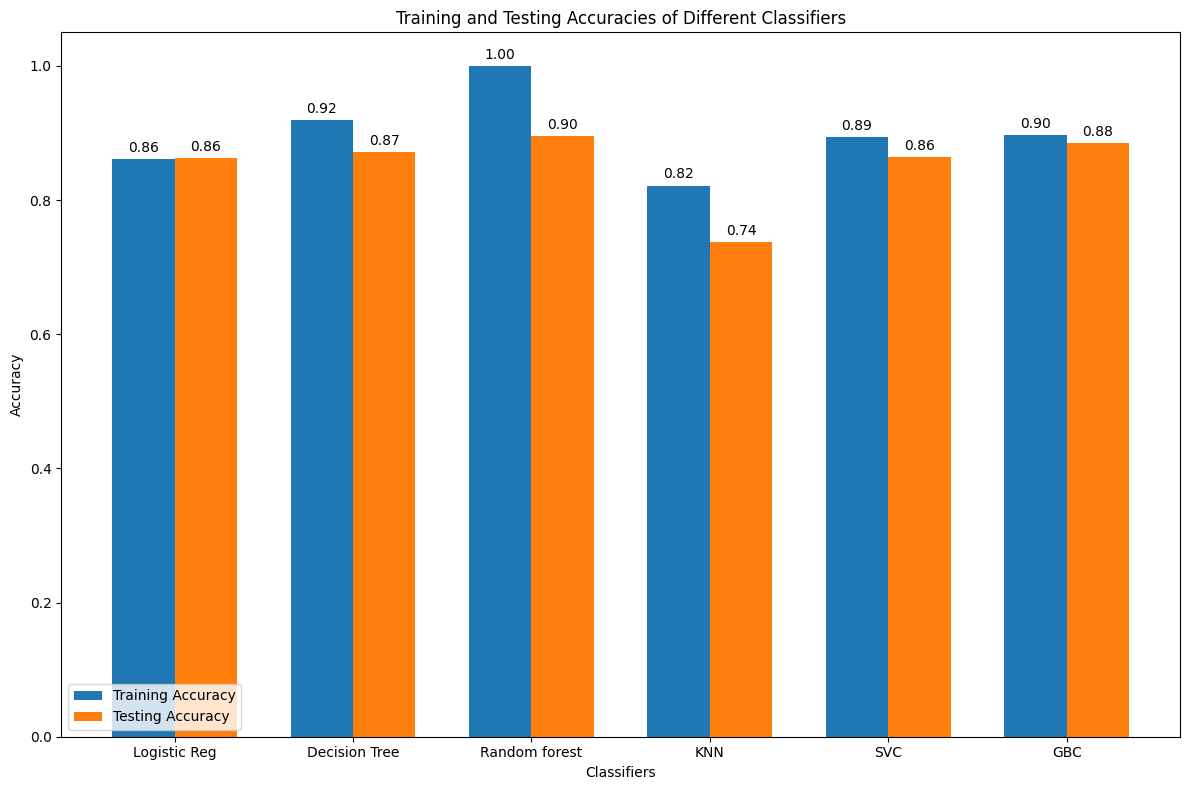

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifiers = ['Logistic Reg', 'Decision Tree', 'Random forest', 'KNN', 'SVC', 'GBC']

# Training accuracies
training_accuracies = [logistic_train, decision_train, randomforest_train, KNN_train, svc_train, gbc_train]

# Testing accuracies
testing_accuracies = [logistic_test, decision_test, randomforest_test, KNN_test, svc_test, gbc_test]

# Plotting
x = np.arange(len(classifiers))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size
rects1 = ax.bar(x - width/2, training_accuracies, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, testing_accuracies, width, label='Testing Accuracy')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Testing Accuracies of Different Classifiers')
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.legend(loc='lower left')

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',  # Format to 2 decimal places
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [98]:
overfitting = [train - test for train, test in zip(training_accuracies, testing_accuracies)]

for clf, diff in zip(classifiers, overfitting):
    print(f"{clf}: Overfitting measure (train - test) = {diff}")


Logistic Reg: Overfitting measure (train - test) = -0.0018833293071172097
Decision Tree: Overfitting measure (train - test) = 0.047798524200343584
Random forest: Overfitting measure (train - test) = 0.10404624277456642
KNN: Overfitting measure (train - test) = 0.08391397287281777
SVC: Overfitting measure (train - test) = 0.03075556296595905
GBC: Overfitting measure (train - test) = 0.011608439691575545


In [99]:
best_index = np.argmax(testing_accuracies)
best_classifier = classifiers[best_index]

print(f"The best classifier is: {best_classifier} with a test accuracy of {testing_accuracies[best_index]:.2f}")


The best classifier is: Random forest with a test accuracy of 0.90
